# Testing workflow

In [1]:
from toolbox_runner.workflow import Workflow
from toolbox_runner import list_tools

In [2]:
# get some sample data
import skgstat as skg
pancake = skg.data.pancake_field().get('sample')
pancake

Array([[214, 215, 215, ..., 188, 191, 193],
       [215, 215, 215, ..., 191, 191, 191],
       [215, 216, 215, ..., 191, 189, 191],
       ...,
       [174, 175, 173, ..., 116, 117, 115],
       [172, 172, 173, ..., 133, 138, 136],
       [174, 174, 174, ..., 129, 142, 142]], dtype=uint8)

In [3]:
tools = list_tools(as_dict=True)
print(tools)

{'variogram': variogram: Variogram fitting  FROM tbr_skgstat:latest VERSION: 1.1, 'kriging': kriging: Kriging interpolation  FROM tbr_skgstat:latest VERSION: 1.0, 'simulation': simulation: Geostatistical simulation  FROM tbr_skgstat:latest VERSION: 1.0, 'sample': sample: Sample field data  FROM tbr_skgstat:latest VERSION: 1.0, 'foobar': foobar: Foo Bar  FROM tbr_octave:latest VERSION: 0.1, 'profile': profile: Dataset Profile  FROM tbr_profile:v1.0.0 VERSION: 0.2}


In [4]:
wf = Workflow()
wf.valid

False

In [5]:
sam = tools.get('sample')
vario = tools.get('variogram')
krige = tools.get('kriging')
prof = tools.get('profile')

In [6]:
wf.add_tool(sam, field=pancake, sample_size=150, method='random', seed=42)

'sample'

In [7]:
wf.add_tool(vario, requires=['sample::coordinates.mat', 'sample::values.mat'], n_lags=15, maxlag='median')

'variogram'

In [8]:
wf.add_tool(krige, requires=['sample::coordinates.mat', 'sample::values.mat', 'variogram::variogram.json'], algorithm='ordinary', grid='100x100')

'kriging'

WORKFLOW GRAPH IS VALID: True


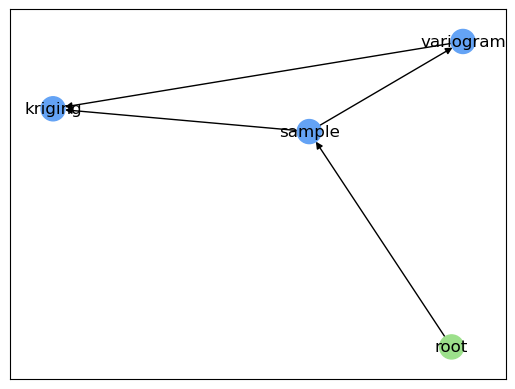

In [9]:
wf.generate_graph()
print(f"WORKFLOW GRAPH IS VALID: {wf.valid}")
wf

## Perform the algorithm

In [23]:
wf.run()

Starting Workflow
wd: /home/mirko/Dropbox/python/tool-runner/wf_test
Tools to run: 3
Step 'sample' already done. No force policy found


In [24]:
wf.steps

{'sample': /home/mirko/Dropbox/python/tool-runner/wf_test/1668001196_sample.tar.gz,
 'variogram': /home/mirko/Dropbox/python/tool-runner/wf_test/1668001200_variogram.tar.gz,
 'kriging': /home/mirko/Dropbox/python/tool-runner/wf_test/1668001205_kriging.tar.gz}

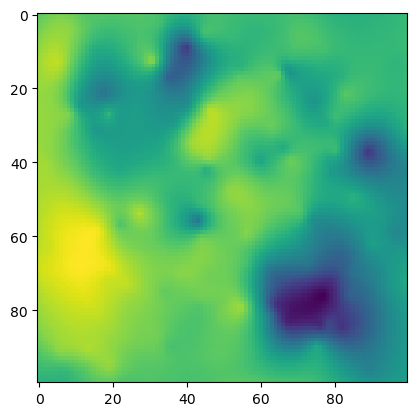

In [19]:
field = wf.steps['kriging'].get('kriging.mat')

import matplotlib.pyplot as plt
plt.imshow(field)